In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

In [24]:
#This line is required to display visualizations in the browser
%matplotlib inline

In [26]:
def mc_pi(ntrials):
    """
    calculate the value of pi using montecarlo method and visualize the process
    
    """
    x = np.random.random(ntrials)
    y = np.random.random(ntrials)
    #masking
    inside_circle = x**2+y**2 < 1
    unit_circle_x = np.linspace(0,1,100)
    unit_circle = [unit_circle_x,np.sqrt(1.0-unit_circle_x**2)]
    plt.plot(*unit_circle,color='black')
    plt.scatter(x[inside_circle],y[inside_circle],marker='.',color='blue',s=1)
    plt.scatter(x[~inside_circle],y[~inside_circle],marker='.',color='red',s=1)
    plt.title("value of $\pi$="+str( 4.0*np.sum(inside_circle)/float(ntrials)))

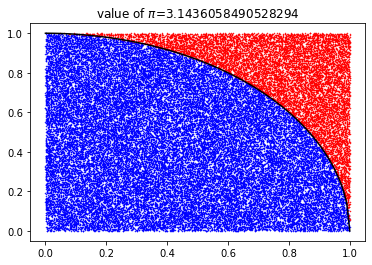

In [28]:
from ipywidgets import interact,interactive,interact_manual
mc_widget=interactive(mc_pi,ntrials=(1,100000,10));
mc_widget

In [30]:
from skimage import data
from skimage.color import rgb2gray

uint8
(768, 1024, 3)


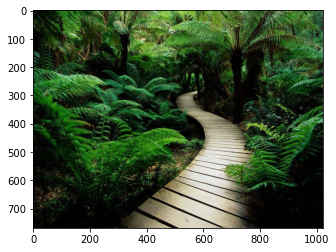

In [32]:
from PIL import Image

img = image.imread('wallpaper2.jpg')
print(img.dtype)
print(img.shape)
plt.imshow(img)

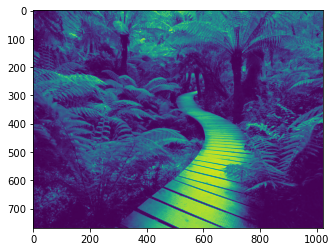

In [34]:
img_grey = np.array(Image.open("wallpaper2.jpg").convert('L'))
plt.imshow(img_grey)

In [36]:
from skimage import img_as_ubyte,img_as_float
gray_images = {
        "img":img_grey,
        "cat":rgb2gray(img_as_float(data.chelsea())),
        "astro":rgb2gray(img_as_float(data.astronaut())),
        "camera":data.camera(),
        "coin": data.coins(),
        "clock":data.clock(),
        "blobs":data.binary_blobs(),
        "coffee":rgb2gray(img_as_float(data.coffee()))
}

In [38]:
from numpy.linalg import svd

In [39]:
def compress_svd(image,k):
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
   
    return reconst_matrix,s

In [62]:
def compress_show_gray_images(img_name,k):
    """
     compresses gray scale images and display the reconstructed image.
     Also displays a plot of singular values
    """
    image=gray_images[img_name]
    original_shape = image.shape
    print("Original shape = " + str(original_shape))
    reconst_img,s = compress_svd(image,k)
    print(s[:k].shape)
    fig,axes = plt.subplots(1,2,figsize=(8,5))
    axes[0].plot(s)
    compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()

Original shape = (768, 1024)
(150,)


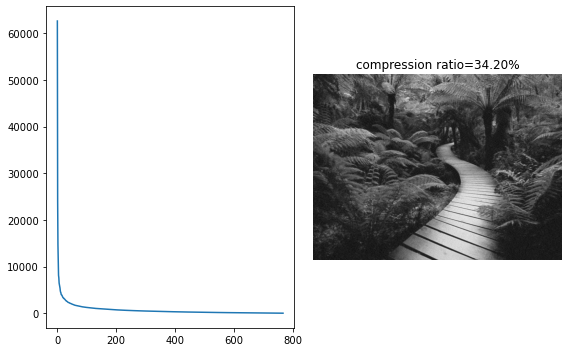

In [63]:
interact(compress_show_gray_images,img_name=list(gray_images.keys()),k=(1,300));

Original shape = (768, 1024)
(50,)


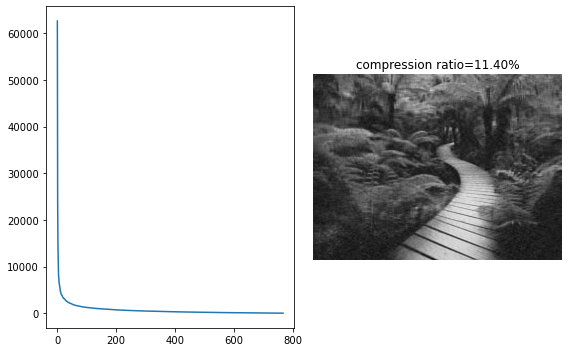

In [64]:
compress_show_gray_images("img", 50)